In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cleaned_Algerian_forest_fires_dataset.csv')

In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['day','month','year'],axis = 1,inplace=True)

In [5]:
df.columns = df.columns.str.strip()  # Removes leading and trailing spaces from column names


In [6]:
#encding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [7]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
X=df.drop('FWI', axis = 1)
y = df['FWI']

In [9]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [10]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:
X_train.shape

(182, 11)

In [42]:
#Feature Selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

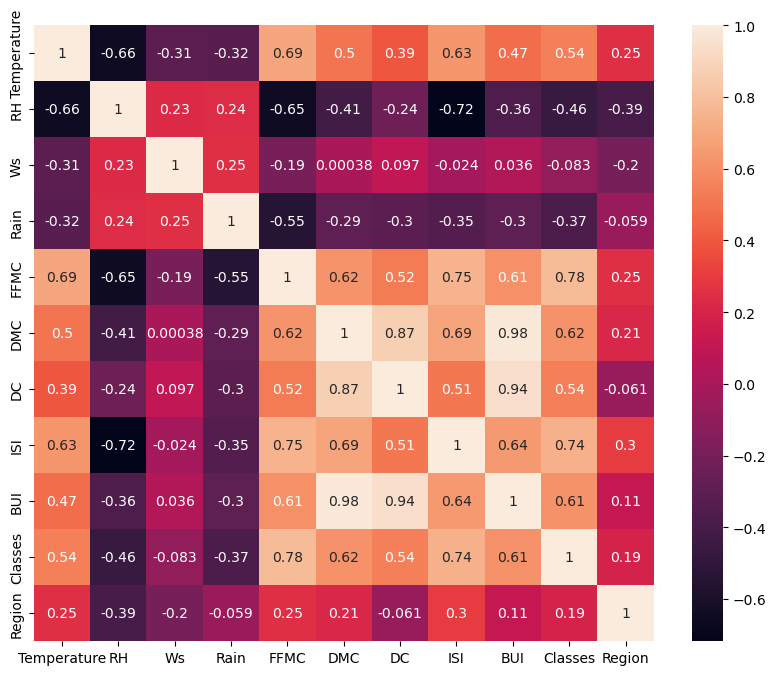

In [46]:
#check for multicoliniarity
plt.figure(figsize=(10,8))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [48]:
def Correlation (dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
#agla bta dega threshold ki kitna corr rkhna h us s jada mt use kro jse 85% bola usne to
corr_features = Correlation(X_train,0.85)

In [52]:
X_train.drop(corr_features,axis = 1,inplace=True)
X_test.drop(corr_features,axis = 1,inplace=True)
X_train.shape,X_test.shape


((182, 9), (61, 9))

In [58]:
#feature Scaling Or Standardixation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [60]:
X_train_scaler

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

/var/folders/7s/krz2vw_11972r_tw7z163z100000gn/T/ipykernel_3959/1704166424.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

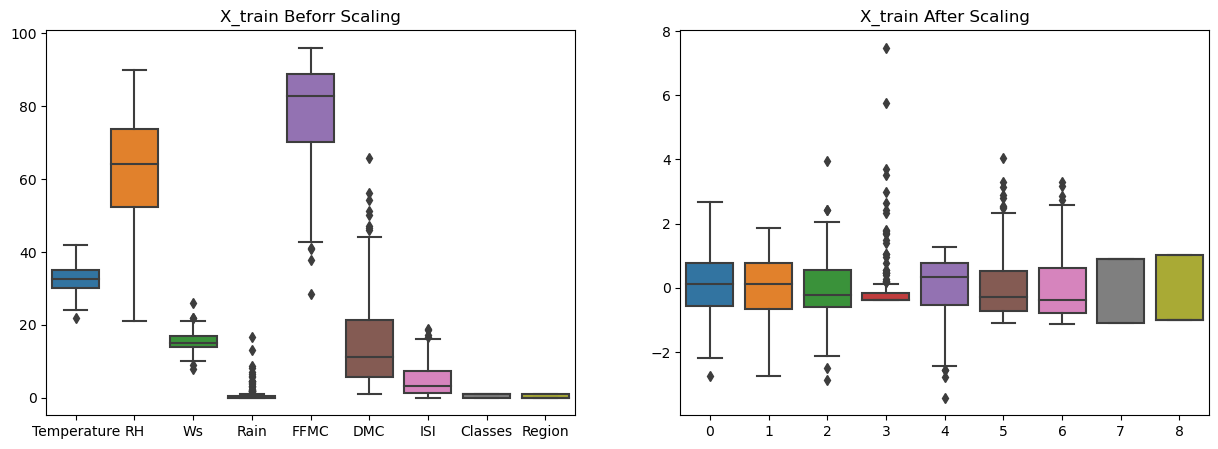

In [88]:
# #box plot to understand effect of Standard Scalar
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Beforr Scaling')
plt.subplot(1,2,2)
sns.boxplot(data= X_train_scaler)
plt.title('X_train After Scaling')
# #Box plot to understand the effect of StandardScaler
# plt.subplots(figsize=(15,5))

# # First subplot - Before Scaling
# plt.subplot(1,2,1)  # 1 row, 2 columns, first plot
# sns.boxplot(data=X_train)
# plt.title('X_train Before Scaling')

# # Second subplot - After Scaling
# plt.subplot(1,2,2)  # 1 row, 2 columns, second plot
# sns.boxplot(data=X_train_scaler)
# plt.title('X_train After Scaling')

# plt.show()


Mean Absolute Error 0.546823646524999
R2 Score 0.9847657384266951


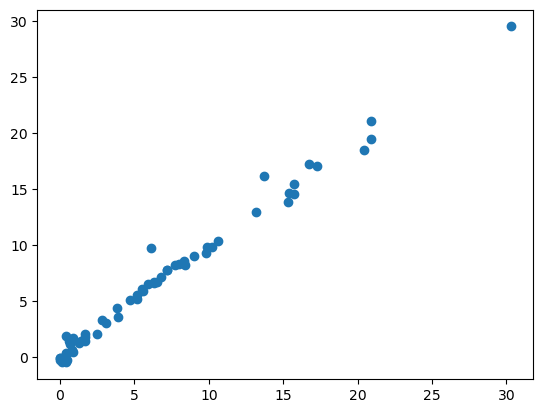

In [112]:
#Liner Regression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaler,Y_train)
Y_pred = model.predict(X_test_scaler)

mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print ("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(Y_test,Y_pred)

##Lasso Regression

Mean Absolute Error 1.1331759949144082
R2 Score 0.9492020263112388


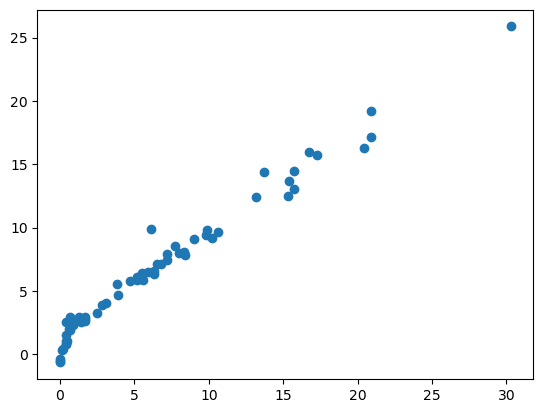

In [115]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(X_train_scaler,Y_train)
Y_pred = Lasso.predict(X_test_scaler)

mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print ("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(Y_test,Y_pred)

Mean Absolute Error 0.5642305340105711
R2 Score 0.9842993364555512


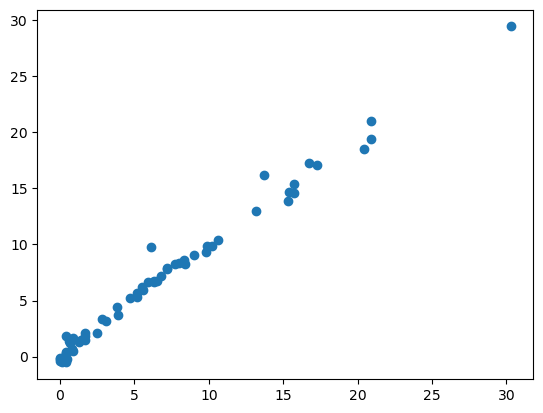

In [117]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train_scaler,Y_train)
Y_pred = Ridge.predict(X_test_scaler)

mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print ("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(Y_test,Y_pred)

##elasticnet


Mean Absolute Error 1.8822353634896
R2 Score 0.8753460589519703


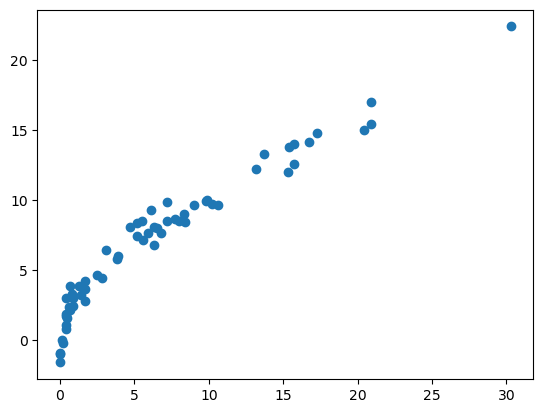

In [121]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet()
ElasticNet.fit(X_train_scaler,Y_train)
Y_pred = ElasticNet.predict(X_test_scaler)

mae = mean_absolute_error(Y_test,Y_pred)
score = r2_score(Y_test,Y_pred)
print ("Mean Absolute Error",mae)
print("R2 Score",score)
plt.scatter(Y_test,Y_pred)